# Import Necessary Libraries

In [18]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import Adam

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from mlxtend.plotting import plot_decision_regions

# Creating Data

In [2]:
X = np.array([[-1.58986e-01,  4.23977e-01],
       [-3.47926e-01,  4.70760e-01],
       [-5.04608e-01,  3.53801e-01],
       [-5.96774e-01,  1.14035e-01],
       [-5.18433e-01, -1.72515e-01],
       [-2.92627e-01, -2.07602e-01],
       [-1.58986e-01, -4.38596e-02],
       [-5.76037e-02,  1.43275e-01],
       [-7.14286e-02,  2.71930e-01],
       [-2.97235e-01,  3.47953e-01],
       [-4.17051e-01,  2.01754e-01],
       [-4.40092e-01,  8.77193e-03],
       [-3.24885e-01, -3.21637e-02],
       [-2.46544e-01,  5.55556e-02],
       [-2.18894e-01,  2.01754e-01],
       [-3.43318e-01,  1.60819e-01],
       [-5.09217e-01,  7.89474e-02],
       [-3.84793e-01, -9.06433e-02],
       [-1.49770e-01,  1.25731e-01],
       [-1.95853e-01,  3.24561e-01],
       [-3.91705e-02, -2.19298e-01],
       [-1.08295e-01, -3.01170e-01],
       [-1.86636e-01, -3.30409e-01],
       [-2.18894e-01, -4.23977e-01],
       [-8.06452e-02, -5.64327e-01],
       [ 6.68203e-02, -5.17544e-01],
       [ 9.44700e-02, -3.24561e-01],
       [ 1.86636e-01, -1.66667e-01],
       [ 6.22120e-02, -7.30994e-02],
       [ 2.07373e-02, -1.95906e-01],
       [ 2.99539e-02, -3.42105e-01],
       [-9.90783e-02, -3.77193e-01],
       [-6.91244e-03, -4.64912e-01],
       [ 1.31336e-01, -4.29825e-01],
       [ 2.32719e-01, -1.95906e-01],
       [ 8.52535e-02, -8.47953e-02],
       [-1.31336e-01, -2.36842e-01],
       [ 2.30415e-03, -1.25731e-01],
       [ 1.22120e-01, -2.92398e-03],
       [-3.47926e-01, -3.12865e-01],
       [-2.28111e-01, -1.25731e-01],
       [-7.60369e-02,  1.46199e-02],
       [ 4.37788e-02,  2.04678e-02],
       [ 1.15207e-02,  1.54971e-01],
       [-4.17051e-01, -1.60819e-01],
       [-3.15668e-01, -3.18713e-01],
       [ 1.26728e-01, -2.19298e-01],
       [ 2.05069e-01, -3.12865e-01],
       [ 2.18894e-01, -4.59064e-01],
       [ 7.14286e-02, -6.46199e-01],
       [-1.31336e-01, -6.05263e-01],
       [-2.09677e-01, -5.81871e-01],
       [-2.28111e-01, -4.29825e-01],
       [-1.45161e-01, -4.12281e-01],
       [-6.68203e-02, -4.82456e-01],
       [ 1.35945e-01, -5.11696e-01],
       [ 2.69585e-01, -4.06433e-01],
       [ 2.97235e-01, -2.95322e-01],
       [ 2.74194e-01, -1.72515e-01],
       [ 2.55760e-01, -4.97076e-02],
       [ 2.23502e-01, -4.97076e-02],
       [ 1.82028e-01, -8.47953e-02],
       [ 1.58986e-01, -1.54971e-01],
       [ 7.14286e-02, -2.13450e-01],
       [ 1.61290e-02, -2.66082e-01],
       [-2.53456e-02, -3.83041e-01],
       [-1.15207e-02, -4.82456e-01],
       [-2.30415e-03, -5.05848e-01],
       [ 2.53456e-02, -5.11696e-01],
       [ 2.53456e-02, -5.58480e-01],
       [ 1.15207e-02, -6.57895e-01],
       [-4.83871e-02, -6.46199e-01],
       [-8.52535e-02, -5.52632e-01],
       [-9.90783e-02, -5.00000e-01],
       [-1.61290e-02, -4.23977e-01],
       [ 1.31336e-01, -3.59649e-01],
       [ 2.23502e-01, -3.71345e-01],
       [ 2.92627e-01, -3.01170e-01],
       [ 2.60369e-01, -2.07602e-01],
       [ 2.00461e-01, -2.25146e-01],
       [ 1.72811e-01, -2.71930e-01],
       [-1.31336e-01,  9.06433e-02],
       [-1.49770e-01,  7.30994e-02],
       [-2.41935e-01,  6.14035e-02],
       [-3.01843e-01,  1.78363e-01],
       [-2.97235e-01,  1.95906e-01],
       [-2.74194e-01,  3.07018e-01],
       [-3.24885e-01,  2.95322e-01],
       [-3.98618e-01,  2.66082e-01],
       [-4.35484e-01,  1.60819e-01],
       [-4.72350e-01,  7.89474e-02],
       [-3.38710e-01,  4.38596e-02],
       [-2.69585e-01,  4.38596e-02],
       [-2.55760e-01,  1.02339e-01],
       [-1.68203e-01,  2.66082e-01],
       [-1.12903e-01,  3.01170e-01],
       [-3.91705e-02,  3.47953e-01],
       [-1.26728e-01,  4.41520e-01],
       [-2.32719e-01,  4.41520e-01],
       [-3.38710e-01,  4.18129e-01],
       [-4.12442e-01,  3.53801e-01],
       [-5.09217e-01,  2.19298e-01],
       [-5.41475e-01,  1.46199e-02],
       [-5.04608e-01, -1.25731e-01],
       [-4.90783e-01, -1.43275e-01],
       [-3.61751e-01, -1.37427e-01],
       [-2.69585e-01, -8.47953e-02],
       [-2.23502e-01, -7.89474e-02],
       [-1.86636e-01, -3.80117e-02],
       [-1.54378e-01, -8.77193e-03],
       [-1.12903e-01,  5.55556e-02],
       [-8.52535e-02,  1.37427e-01],
       [-8.52535e-02,  2.77778e-01],
       [-1.68203e-01,  3.01170e-01],
       [-1.91244e-01,  1.95906e-01],
       [-1.40553e-01, -4.97076e-02],
       [-2.99539e-02,  6.72515e-02],
       [-2.00461e-01, -2.30994e-01],
       [-1.08295e-01, -8.47953e-02],
       [ 3.45622e-02,  6.72515e-02],
       [ 8.06452e-02,  1.19883e-01],
       [-3.85369e-01,  3.30409e-02],
       [-3.81221e-01,  1.31287e-01],
       [-3.52189e-01,  2.58187e-01],
       [-3.54263e-01,  3.64620e-01],
       [-4.14401e-01, -6.92982e-02],
       [-4.99424e-01, -3.24561e-02],
       [-2.98272e-01, -9.79532e-02],
       [-3.16935e-01, -1.83918e-01],
       [-3.68779e-01, -2.90351e-01],
       [-3.56336e-01, -3.96784e-01],
       [-2.71313e-01,  4.38596e-03],
       [-1.77995e-01,  8.62573e-02],
       [-2.46429e-01,  1.43567e-01],
       [-2.50576e-01,  2.29532e-01],
       [-2.21544e-01,  3.76901e-01],
       [-2.15323e-01,  2.95029e-01],
       [-1.30300e-01,  2.17251e-01],
       [-2.07028e-01,  2.89474e-02],
       [-9.71198e-02,  2.13158e-01],
       [-3.90553e-02,  2.58187e-01],
       [ 1.90092e-02,  4.01462e-01],
       [-3.69816e-02,  4.21930e-01],
       [-6.39401e-02,  3.31871e-01],
       [-1.30300e-01,  3.76901e-01],
       [-3.75000e-01, -4.37719e-01],
       [-3.95737e-01, -3.51754e-01],
       [-3.54263e-01, -2.08480e-01],
       [-4.37212e-01, -3.76316e-01],
       [-4.80760e-01, -5.03216e-01],
       [-4.10253e-01, -4.66374e-01],
       [-2.48502e-01, -2.57602e-01],
       [-2.27765e-01, -3.14912e-01],
       [-2.83756e-01, -3.84503e-01],
       [-2.92051e-01, -4.54094e-01],
       [-3.37673e-01, -5.19591e-01],
       [-2.77535e-01, -5.48246e-01],
       [-2.07028e-01, -5.35965e-01],
       [-1.86290e-01, -4.78655e-01],
       [-1.32373e-01, -5.07310e-01],
       [-1.77995e-01, -2.98538e-01],
       [-1.65553e-01, -1.75731e-01],
       [-1.61406e-01, -1.26608e-01],
       [ 3.45622e-04,  2.58187e-01],
       [ 7.91475e-02,  3.56433e-01],
       [-2.66129e-02,  1.80409e-01],
       [-5.35714e-02,  7.80702e-02],
       [-1.41705e-02, -5.29240e-02],
       [-7.01613e-02, -1.63450e-01],
       [-6.39401e-02, -2.94444e-01],
       [-3.07604e-02, -4.66374e-01],
       [-5.77189e-02, -5.27778e-01],
       [-5.35714e-02, -3.96784e-01],
       [ 5.21889e-02, -4.17251e-01],
       [-1.62442e-02, -1.67544e-01],
       [-6.39401e-02, -8.56725e-02],
       [-6.18664e-02, -1.60819e-02],
       [-3.80184e-03,  4.38596e-03],
       [ 4.18203e-02,  2.04971e-01],
       [ 7.91475e-02,  1.92690e-01],
       [ 4.59677e-02,  2.54094e-01],
       [ 1.18548e-01,  1.92690e-01],
       [ 1.10253e-01,  8.62573e-02],
       [ 1.08180e-01, -6.92982e-02],
       [ 1.66244e-01, -2.42690e-02],
       [ 1.41359e-01,  6.57895e-02],
       [ 1.43433e-01,  1.68129e-01],
       [ 1.70392e-01,  1.92690e-01],
       [ 1.08180e-01,  2.99123e-01],
       [ 1.18548e-01,  3.19591e-01],
       [ 1.26843e-01,  3.93275e-01],
       [-8.67512e-02,  4.21930e-01],
       [-4.73502e-02,  5.07895e-01],
       [ 2.52304e-02,  5.20175e-01],
       [ 6.25576e-02,  5.52924e-01],
       [-5.87558e-03,  4.42398e-01],
       [-5.14977e-02,  5.73392e-01],
       [-8.05300e-02,  5.07895e-01],
       [-1.53111e-01,  5.52924e-01],
       [-1.11636e-01,  5.48830e-01],
       [-1.63479e-01,  4.91520e-01],
       [-2.52650e-01, -1.88012e-01],
       [-2.46429e-01, -3.65497e-02],
       [-3.21083e-01, -4.33626e-01],
       [-3.31452e-01, -6.05556e-01],
       [-3.85369e-01, -5.15497e-01],
       [-3.99885e-01, -6.21930e-01],
       [-1.24078e-01, -1.26608e-01],
       [-3.16935e-01, -2.28947e-01],
       [-2.94124e-01, -1.34795e-01],
       [-1.53111e-01,  1.84503e-01]])

In [3]:
y = np.array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0.,
       0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       0., 1., 1., 1., 1., 0., 0.])

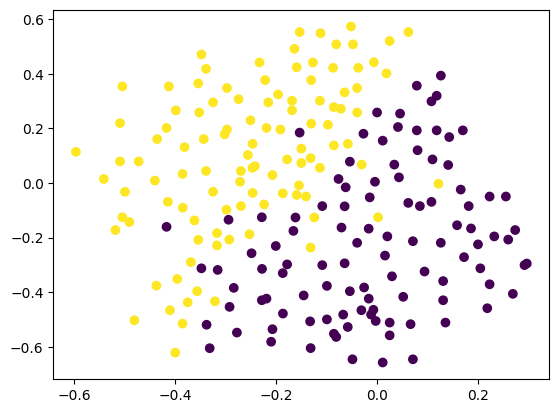

In [13]:
plt.scatter(X[:,0], X[:,1], c=y)
plt.show()

# Modeling

In [26]:
model_1 = Sequential()

model_1.add(Dense(128, input_dim=2, activation="relu"))
model_1.add(Dense(128, activation="relu"))
model_1.add(Dense(1, activation="sigmoid")) # 'sigmoid' cause This is binary classification problem

adam = Adam(learning_rate=0.01)
model_1.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

history = model_1.fit(X, y, epochs=500, validation_split = 0.2,verbose=1)

Epoch 1/500
6/6 [==============================] - 1s 54ms/step - loss: 0.5533 - accuracy: 0.8512 - val_loss: 0.6446 - val_accuracy: 0.5814
Epoch 2/500
6/6 [==============================] - 0s 12ms/step - loss: 0.2828 - accuracy: 0.8810 - val_loss: 0.6492 - val_accuracy: 0.6744
Epoch 3/500
6/6 [==============================] - 0s 13ms/step - loss: 0.2551 - accuracy: 0.8869 - val_loss: 0.3289 - val_accuracy: 0.8605
Epoch 4/500
6/6 [==============================] - 0s 14ms/step - loss: 0.2289 - accuracy: 0.9345 - val_loss: 0.3363 - val_accuracy: 0.8837
Epoch 5/500
6/6 [==============================] - 0s 13ms/step - loss: 0.2297 - accuracy: 0.9167 - val_loss: 0.3878 - val_accuracy: 0.8372
Epoch 6/500
6/6 [==============================] - 0s 13ms/step - loss: 0.2301 - accuracy: 0.9107 - val_loss: 0.3868 - val_accuracy: 0.8372
Epoch 7/500
6/6 [==============================] - 0s 13ms/step - loss: 0.2402 - accuracy: 0.9048 - val_loss: 0.4009 - val_accuracy: 0.8372
Epoch 8/500
6/6 [===

6/6 [==============================] - 0s 14ms/step - loss: 0.1530 - accuracy: 0.9405 - val_loss: 0.4626 - val_accuracy: 0.8372
Epoch 60/500
6/6 [==============================] - 0s 13ms/step - loss: 0.1406 - accuracy: 0.9524 - val_loss: 0.3994 - val_accuracy: 0.8837
Epoch 61/500
6/6 [==============================] - 0s 13ms/step - loss: 0.1319 - accuracy: 0.9583 - val_loss: 0.4092 - val_accuracy: 0.8605
Epoch 62/500
6/6 [==============================] - 0s 13ms/step - loss: 0.1349 - accuracy: 0.9583 - val_loss: 0.4490 - val_accuracy: 0.8605
Epoch 63/500
6/6 [==============================] - 0s 12ms/step - loss: 0.1347 - accuracy: 0.9583 - val_loss: 0.4591 - val_accuracy: 0.8372
Epoch 64/500
6/6 [==============================] - 0s 11ms/step - loss: 0.1316 - accuracy: 0.9524 - val_loss: 0.4785 - val_accuracy: 0.8372
Epoch 65/500
6/6 [==============================] - 0s 11ms/step - loss: 0.1307 - accuracy: 0.9405 - val_loss: 0.4330 - val_accuracy: 0.8605
Epoch 66/500
6/6 [========

6/6 [==============================] - 0s 15ms/step - loss: 0.0982 - accuracy: 0.9643 - val_loss: 0.6003 - val_accuracy: 0.8837
Epoch 118/500
6/6 [==============================] - 0s 15ms/step - loss: 0.1005 - accuracy: 0.9583 - val_loss: 0.7905 - val_accuracy: 0.8605
Epoch 119/500
6/6 [==============================] - 0s 11ms/step - loss: 0.1165 - accuracy: 0.9464 - val_loss: 0.6395 - val_accuracy: 0.8837
Epoch 120/500
6/6 [==============================] - 0s 11ms/step - loss: 0.1276 - accuracy: 0.9464 - val_loss: 0.6521 - val_accuracy: 0.8837
Epoch 121/500
6/6 [==============================] - 0s 11ms/step - loss: 0.0922 - accuracy: 0.9583 - val_loss: 0.8032 - val_accuracy: 0.8372
Epoch 122/500
6/6 [==============================] - 0s 11ms/step - loss: 0.0970 - accuracy: 0.9583 - val_loss: 0.7516 - val_accuracy: 0.8605
Epoch 123/500
6/6 [==============================] - 0s 11ms/step - loss: 0.0894 - accuracy: 0.9583 - val_loss: 0.6318 - val_accuracy: 0.8372
Epoch 124/500
6/6 [=

Epoch 175/500
6/6 [==============================] - 0s 11ms/step - loss: 0.0782 - accuracy: 0.9643 - val_loss: 0.9375 - val_accuracy: 0.8605
Epoch 176/500
6/6 [==============================] - 0s 12ms/step - loss: 0.0716 - accuracy: 0.9583 - val_loss: 0.8604 - val_accuracy: 0.8372
Epoch 177/500
6/6 [==============================] - 0s 12ms/step - loss: 0.0785 - accuracy: 0.9702 - val_loss: 0.9089 - val_accuracy: 0.8605
Epoch 178/500
6/6 [==============================] - 0s 12ms/step - loss: 0.0764 - accuracy: 0.9643 - val_loss: 1.1299 - val_accuracy: 0.8140
Epoch 179/500
6/6 [==============================] - 0s 11ms/step - loss: 0.0911 - accuracy: 0.9583 - val_loss: 0.8950 - val_accuracy: 0.8372
Epoch 180/500
6/6 [==============================] - 0s 12ms/step - loss: 0.1882 - accuracy: 0.9405 - val_loss: 0.8176 - val_accuracy: 0.8605
Epoch 181/500
6/6 [==============================] - 0s 12ms/step - loss: 0.1042 - accuracy: 0.9524 - val_loss: 1.7040 - val_accuracy: 0.7907
Epoch 

Epoch 233/500
6/6 [==============================] - 0s 12ms/step - loss: 0.0722 - accuracy: 0.9762 - val_loss: 0.9046 - val_accuracy: 0.8605
Epoch 234/500
6/6 [==============================] - 0s 12ms/step - loss: 0.0836 - accuracy: 0.9702 - val_loss: 1.0108 - val_accuracy: 0.8372
Epoch 235/500
6/6 [==============================] - 0s 12ms/step - loss: 0.0703 - accuracy: 0.9643 - val_loss: 1.2025 - val_accuracy: 0.8372
Epoch 236/500
6/6 [==============================] - 0s 11ms/step - loss: 0.1673 - accuracy: 0.9702 - val_loss: 1.3997 - val_accuracy: 0.8140
Epoch 237/500
6/6 [==============================] - 0s 12ms/step - loss: 0.1005 - accuracy: 0.9583 - val_loss: 1.0449 - val_accuracy: 0.8372
Epoch 238/500
6/6 [==============================] - 0s 12ms/step - loss: 0.1015 - accuracy: 0.9464 - val_loss: 0.8800 - val_accuracy: 0.8372
Epoch 239/500
6/6 [==============================] - 0s 12ms/step - loss: 0.1099 - accuracy: 0.9643 - val_loss: 1.1492 - val_accuracy: 0.7442
Epoch 

Epoch 291/500
6/6 [==============================] - 0s 12ms/step - loss: 0.0877 - accuracy: 0.9702 - val_loss: 1.1435 - val_accuracy: 0.8372
Epoch 292/500
6/6 [==============================] - 0s 12ms/step - loss: 0.1443 - accuracy: 0.9524 - val_loss: 2.4541 - val_accuracy: 0.6744
Epoch 293/500
6/6 [==============================] - 0s 11ms/step - loss: 0.1274 - accuracy: 0.9464 - val_loss: 1.9245 - val_accuracy: 0.8372
Epoch 294/500
6/6 [==============================] - 0s 12ms/step - loss: 0.1683 - accuracy: 0.9524 - val_loss: 1.4603 - val_accuracy: 0.8372
Epoch 295/500
6/6 [==============================] - 0s 12ms/step - loss: 0.0958 - accuracy: 0.9643 - val_loss: 0.9070 - val_accuracy: 0.8837
Epoch 296/500
6/6 [==============================] - 0s 12ms/step - loss: 0.1018 - accuracy: 0.9524 - val_loss: 1.0156 - val_accuracy: 0.8372
Epoch 297/500
6/6 [==============================] - 0s 11ms/step - loss: 0.0733 - accuracy: 0.9762 - val_loss: 1.1654 - val_accuracy: 0.8605
Epoch 

Epoch 349/500
6/6 [==============================] - 0s 12ms/step - loss: 0.0535 - accuracy: 0.9821 - val_loss: 1.5176 - val_accuracy: 0.8140
Epoch 350/500
6/6 [==============================] - 0s 12ms/step - loss: 0.0520 - accuracy: 0.9881 - val_loss: 1.3820 - val_accuracy: 0.8372
Epoch 351/500
6/6 [==============================] - 0s 12ms/step - loss: 0.0494 - accuracy: 0.9762 - val_loss: 1.4134 - val_accuracy: 0.8372
Epoch 352/500
6/6 [==============================] - 0s 12ms/step - loss: 0.0448 - accuracy: 0.9881 - val_loss: 1.4828 - val_accuracy: 0.8372
Epoch 353/500
6/6 [==============================] - 0s 12ms/step - loss: 0.0457 - accuracy: 0.9821 - val_loss: 1.5191 - val_accuracy: 0.8372
Epoch 354/500
6/6 [==============================] - 0s 12ms/step - loss: 0.0463 - accuracy: 0.9881 - val_loss: 1.4586 - val_accuracy: 0.8372
Epoch 355/500
6/6 [==============================] - 0s 12ms/step - loss: 0.0456 - accuracy: 0.9821 - val_loss: 1.3588 - val_accuracy: 0.8372
Epoch 

Epoch 407/500
6/6 [==============================] - 0s 12ms/step - loss: 0.0440 - accuracy: 0.9821 - val_loss: 1.8724 - val_accuracy: 0.7442
Epoch 408/500
6/6 [==============================] - 0s 11ms/step - loss: 0.0446 - accuracy: 0.9821 - val_loss: 1.9025 - val_accuracy: 0.7442
Epoch 409/500
6/6 [==============================] - 0s 11ms/step - loss: 0.0451 - accuracy: 0.9821 - val_loss: 1.7645 - val_accuracy: 0.7674
Epoch 410/500
6/6 [==============================] - 0s 12ms/step - loss: 0.0502 - accuracy: 0.9762 - val_loss: 1.6862 - val_accuracy: 0.7674
Epoch 411/500
6/6 [==============================] - 0s 12ms/step - loss: 0.0528 - accuracy: 0.9821 - val_loss: 1.9647 - val_accuracy: 0.8140
Epoch 412/500
6/6 [==============================] - 0s 12ms/step - loss: 0.1108 - accuracy: 0.9702 - val_loss: 1.8775 - val_accuracy: 0.7907
Epoch 413/500
6/6 [==============================] - 0s 12ms/step - loss: 0.0799 - accuracy: 0.9702 - val_loss: 2.0394 - val_accuracy: 0.7209
Epoch 

Epoch 465/500
6/6 [==============================] - 0s 12ms/step - loss: 0.0422 - accuracy: 0.9821 - val_loss: 1.9981 - val_accuracy: 0.7907
Epoch 466/500
6/6 [==============================] - 0s 12ms/step - loss: 0.0382 - accuracy: 0.9821 - val_loss: 2.0367 - val_accuracy: 0.7907
Epoch 467/500
6/6 [==============================] - 0s 11ms/step - loss: 0.0390 - accuracy: 0.9762 - val_loss: 1.9072 - val_accuracy: 0.7674
Epoch 468/500
6/6 [==============================] - 0s 11ms/step - loss: 0.0394 - accuracy: 0.9821 - val_loss: 2.0160 - val_accuracy: 0.7907
Epoch 469/500
6/6 [==============================] - 0s 11ms/step - loss: 0.0387 - accuracy: 0.9821 - val_loss: 2.1188 - val_accuracy: 0.7907
Epoch 470/500
6/6 [==============================] - 0s 12ms/step - loss: 0.0420 - accuracy: 0.9821 - val_loss: 2.1085 - val_accuracy: 0.7907
Epoch 471/500
6/6 [==============================] - 0s 12ms/step - loss: 0.0401 - accuracy: 0.9762 - val_loss: 1.9207 - val_accuracy: 0.7907
Epoch 

9600/9600 [==============================] - 16s 2ms/step


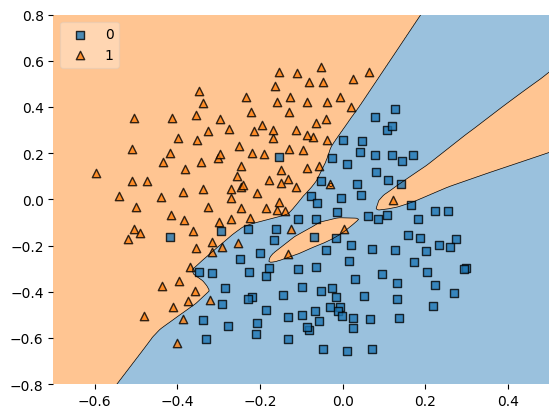

In [27]:
plot_decision_regions(X, y.astype('int'), clf=model_1, legend=2)
plt.xlim(-0.7,0.5)
plt.ylim(-0.8,0.8)
plt.show()

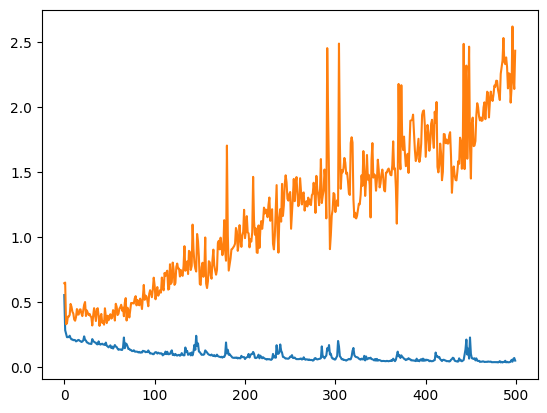

In [28]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

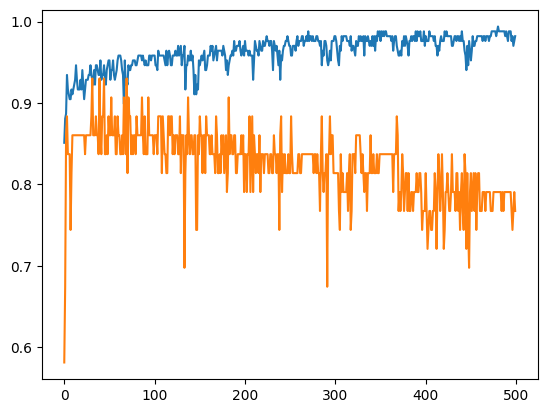

In [29]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

In [30]:
model_2 = Sequential()

model_2.add(Dense(128, input_dim=2, activation="relu"))
model_2.add(Dropout(0.5))
model_2.add(Dense(128, activation="relu"))
model_2.add(Dropout(0.5))
model_2.add(Dense(1, activation="sigmoid"))

adam = Adam(learning_rate=0.01)
model_2.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

history = model_2.fit(X, y, epochs=500, validation_split = 0.2,verbose=1)

Epoch 1/500
6/6 [==============================] - 1s 54ms/step - loss: 0.5858 - accuracy: 0.7738 - val_loss: 0.7008 - val_accuracy: 0.5581
Epoch 2/500
6/6 [==============================] - 0s 13ms/step - loss: 0.3006 - accuracy: 0.8929 - val_loss: 0.6121 - val_accuracy: 0.6977
Epoch 3/500
6/6 [==============================] - 0s 13ms/step - loss: 0.2606 - accuracy: 0.8929 - val_loss: 0.4439 - val_accuracy: 0.7674
Epoch 4/500
6/6 [==============================] - 0s 13ms/step - loss: 0.2494 - accuracy: 0.8988 - val_loss: 0.3464 - val_accuracy: 0.8837
Epoch 5/500
6/6 [==============================] - 0s 12ms/step - loss: 0.2635 - accuracy: 0.8869 - val_loss: 0.3502 - val_accuracy: 0.8605
Epoch 6/500
6/6 [==============================] - 0s 12ms/step - loss: 0.2304 - accuracy: 0.8988 - val_loss: 0.4961 - val_accuracy: 0.7442
Epoch 7/500
6/6 [==============================] - 0s 13ms/step - loss: 0.2347 - accuracy: 0.9048 - val_loss: 0.3987 - val_accuracy: 0.8372
Epoch 8/500
6/6 [===

6/6 [==============================] - 0s 12ms/step - loss: 0.2242 - accuracy: 0.9226 - val_loss: 0.4327 - val_accuracy: 0.8140
Epoch 60/500
6/6 [==============================] - 0s 12ms/step - loss: 0.2169 - accuracy: 0.9048 - val_loss: 0.4139 - val_accuracy: 0.8605
Epoch 61/500
6/6 [==============================] - 0s 12ms/step - loss: 0.1935 - accuracy: 0.9345 - val_loss: 0.4356 - val_accuracy: 0.8605
Epoch 62/500
6/6 [==============================] - 0s 12ms/step - loss: 0.2007 - accuracy: 0.9226 - val_loss: 0.4539 - val_accuracy: 0.8605
Epoch 63/500
6/6 [==============================] - 0s 12ms/step - loss: 0.1963 - accuracy: 0.9226 - val_loss: 0.3831 - val_accuracy: 0.8605
Epoch 64/500
6/6 [==============================] - 0s 12ms/step - loss: 0.1711 - accuracy: 0.9286 - val_loss: 0.3989 - val_accuracy: 0.8605
Epoch 65/500
6/6 [==============================] - 0s 12ms/step - loss: 0.1976 - accuracy: 0.9345 - val_loss: 0.4262 - val_accuracy: 0.8605
Epoch 66/500
6/6 [========

6/6 [==============================] - 0s 12ms/step - loss: 0.1974 - accuracy: 0.9167 - val_loss: 0.4698 - val_accuracy: 0.8372
Epoch 118/500
6/6 [==============================] - 0s 12ms/step - loss: 0.1692 - accuracy: 0.9405 - val_loss: 0.4229 - val_accuracy: 0.8837
Epoch 119/500
6/6 [==============================] - 0s 12ms/step - loss: 0.1834 - accuracy: 0.9345 - val_loss: 0.4626 - val_accuracy: 0.8605
Epoch 120/500
6/6 [==============================] - 0s 12ms/step - loss: 0.1795 - accuracy: 0.9286 - val_loss: 0.5349 - val_accuracy: 0.8605
Epoch 121/500
6/6 [==============================] - 0s 12ms/step - loss: 0.2062 - accuracy: 0.9107 - val_loss: 0.4498 - val_accuracy: 0.8605
Epoch 122/500
6/6 [==============================] - 0s 12ms/step - loss: 0.1885 - accuracy: 0.9226 - val_loss: 0.4915 - val_accuracy: 0.8605
Epoch 123/500
6/6 [==============================] - 0s 14ms/step - loss: 0.1973 - accuracy: 0.9286 - val_loss: 0.5133 - val_accuracy: 0.8605
Epoch 124/500
6/6 [=

Epoch 175/500
6/6 [==============================] - 0s 12ms/step - loss: 0.1696 - accuracy: 0.9464 - val_loss: 0.4855 - val_accuracy: 0.8605
Epoch 176/500
6/6 [==============================] - 0s 12ms/step - loss: 0.1988 - accuracy: 0.9167 - val_loss: 0.4905 - val_accuracy: 0.8372
Epoch 177/500
6/6 [==============================] - 0s 12ms/step - loss: 0.1927 - accuracy: 0.9226 - val_loss: 0.4269 - val_accuracy: 0.8605
Epoch 178/500
6/6 [==============================] - 0s 12ms/step - loss: 0.1917 - accuracy: 0.9226 - val_loss: 0.4134 - val_accuracy: 0.8605
Epoch 179/500
6/6 [==============================] - 0s 12ms/step - loss: 0.1731 - accuracy: 0.9286 - val_loss: 0.4713 - val_accuracy: 0.8605
Epoch 180/500
6/6 [==============================] - 0s 12ms/step - loss: 0.1830 - accuracy: 0.9286 - val_loss: 0.5243 - val_accuracy: 0.8605
Epoch 181/500
6/6 [==============================] - 0s 12ms/step - loss: 0.2013 - accuracy: 0.9405 - val_loss: 0.5029 - val_accuracy: 0.8605
Epoch 

Epoch 233/500
6/6 [==============================] - 0s 17ms/step - loss: 0.1667 - accuracy: 0.9286 - val_loss: 0.7700 - val_accuracy: 0.8605
Epoch 234/500
6/6 [==============================] - 0s 12ms/step - loss: 0.1843 - accuracy: 0.9167 - val_loss: 0.7686 - val_accuracy: 0.8605
Epoch 235/500
6/6 [==============================] - 0s 12ms/step - loss: 0.1977 - accuracy: 0.9405 - val_loss: 0.6362 - val_accuracy: 0.8605
Epoch 236/500
6/6 [==============================] - 0s 12ms/step - loss: 0.2095 - accuracy: 0.9226 - val_loss: 0.6535 - val_accuracy: 0.9070
Epoch 237/500
6/6 [==============================] - 0s 12ms/step - loss: 0.1864 - accuracy: 0.9345 - val_loss: 0.7104 - val_accuracy: 0.8605
Epoch 238/500
6/6 [==============================] - 0s 12ms/step - loss: 0.1644 - accuracy: 0.9286 - val_loss: 0.8157 - val_accuracy: 0.8372
Epoch 239/500
6/6 [==============================] - 0s 12ms/step - loss: 0.1796 - accuracy: 0.9048 - val_loss: 0.8006 - val_accuracy: 0.8372
Epoch 

Epoch 291/500
6/6 [==============================] - 0s 12ms/step - loss: 0.1622 - accuracy: 0.9286 - val_loss: 0.7216 - val_accuracy: 0.8372
Epoch 292/500
6/6 [==============================] - 0s 12ms/step - loss: 0.1903 - accuracy: 0.9167 - val_loss: 0.7632 - val_accuracy: 0.8372
Epoch 293/500
6/6 [==============================] - 0s 12ms/step - loss: 0.1849 - accuracy: 0.9107 - val_loss: 0.7844 - val_accuracy: 0.8372
Epoch 294/500
6/6 [==============================] - 0s 13ms/step - loss: 0.2204 - accuracy: 0.9107 - val_loss: 0.7437 - val_accuracy: 0.8605
Epoch 295/500
6/6 [==============================] - 0s 12ms/step - loss: 0.1990 - accuracy: 0.9167 - val_loss: 0.7723 - val_accuracy: 0.8605
Epoch 296/500
6/6 [==============================] - 0s 12ms/step - loss: 0.1971 - accuracy: 0.9107 - val_loss: 0.7425 - val_accuracy: 0.8605
Epoch 297/500
6/6 [==============================] - 0s 12ms/step - loss: 0.2182 - accuracy: 0.9167 - val_loss: 0.7405 - val_accuracy: 0.8372
Epoch 

Epoch 349/500
6/6 [==============================] - 0s 12ms/step - loss: 0.1530 - accuracy: 0.9405 - val_loss: 0.8984 - val_accuracy: 0.8605
Epoch 350/500
6/6 [==============================] - 0s 11ms/step - loss: 0.1690 - accuracy: 0.9048 - val_loss: 0.8446 - val_accuracy: 0.8605
Epoch 351/500
6/6 [==============================] - 0s 11ms/step - loss: 0.1636 - accuracy: 0.9167 - val_loss: 0.8460 - val_accuracy: 0.8605
Epoch 352/500
6/6 [==============================] - 0s 11ms/step - loss: 0.1530 - accuracy: 0.9464 - val_loss: 0.8977 - val_accuracy: 0.8372
Epoch 353/500
6/6 [==============================] - 0s 11ms/step - loss: 0.1757 - accuracy: 0.9226 - val_loss: 0.8992 - val_accuracy: 0.8372
Epoch 354/500
6/6 [==============================] - 0s 11ms/step - loss: 0.1718 - accuracy: 0.9226 - val_loss: 0.9915 - val_accuracy: 0.8372
Epoch 355/500
6/6 [==============================] - 0s 11ms/step - loss: 0.1915 - accuracy: 0.9167 - val_loss: 1.0147 - val_accuracy: 0.8605
Epoch 

Epoch 407/500
6/6 [==============================] - 0s 16ms/step - loss: 0.1502 - accuracy: 0.9226 - val_loss: 0.9707 - val_accuracy: 0.8605
Epoch 408/500
6/6 [==============================] - 0s 16ms/step - loss: 0.1548 - accuracy: 0.9286 - val_loss: 0.9164 - val_accuracy: 0.8605
Epoch 409/500
6/6 [==============================] - 0s 13ms/step - loss: 0.1466 - accuracy: 0.9286 - val_loss: 0.6258 - val_accuracy: 0.9070
Epoch 410/500
6/6 [==============================] - 0s 13ms/step - loss: 0.1335 - accuracy: 0.9464 - val_loss: 0.5820 - val_accuracy: 0.9070
Epoch 411/500
6/6 [==============================] - 0s 13ms/step - loss: 0.1551 - accuracy: 0.9464 - val_loss: 0.6934 - val_accuracy: 0.8372
Epoch 412/500
6/6 [==============================] - 0s 12ms/step - loss: 0.1885 - accuracy: 0.9286 - val_loss: 0.7370 - val_accuracy: 0.8372
Epoch 413/500
6/6 [==============================] - 0s 12ms/step - loss: 0.1709 - accuracy: 0.9345 - val_loss: 0.7351 - val_accuracy: 0.8605
Epoch 

Epoch 465/500
6/6 [==============================] - 0s 11ms/step - loss: 0.1540 - accuracy: 0.9286 - val_loss: 0.9787 - val_accuracy: 0.8605
Epoch 466/500
6/6 [==============================] - 0s 11ms/step - loss: 0.1755 - accuracy: 0.9345 - val_loss: 0.9939 - val_accuracy: 0.8605
Epoch 467/500
6/6 [==============================] - 0s 13ms/step - loss: 0.1453 - accuracy: 0.9524 - val_loss: 1.0328 - val_accuracy: 0.8605
Epoch 468/500
6/6 [==============================] - 0s 13ms/step - loss: 0.1575 - accuracy: 0.9345 - val_loss: 1.0537 - val_accuracy: 0.8605
Epoch 469/500
6/6 [==============================] - 0s 14ms/step - loss: 0.1544 - accuracy: 0.9286 - val_loss: 1.0090 - val_accuracy: 0.8605
Epoch 470/500
6/6 [==============================] - 0s 11ms/step - loss: 0.1663 - accuracy: 0.9405 - val_loss: 0.8908 - val_accuracy: 0.8837
Epoch 471/500
6/6 [==============================] - 0s 11ms/step - loss: 0.1623 - accuracy: 0.9286 - val_loss: 0.8544 - val_accuracy: 0.8837
Epoch 

9600/9600 [==============================] - 17s 2ms/step


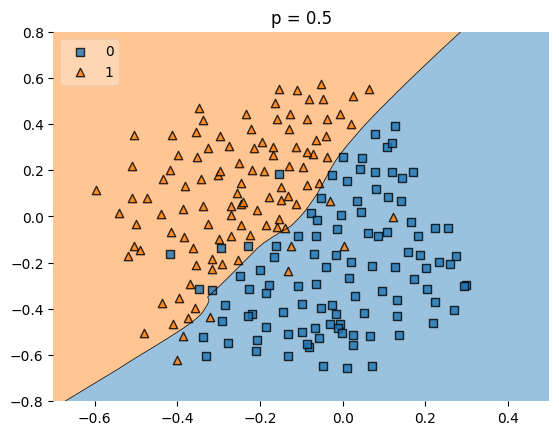

In [31]:
plot_decision_regions(X, y.astype('int'), clf=model_2, legend=2)
plt.xlim(-0.7,0.5)
plt.ylim(-0.8,0.8)
plt.title('p = 0.5')
plt.show()

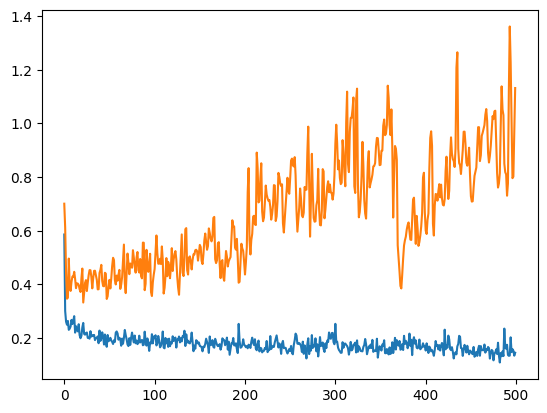

In [32]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

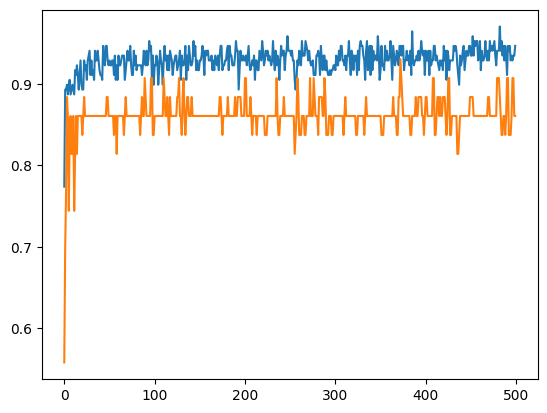

In [33]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

70313/70313 [==============================] - 144s 2ms/step


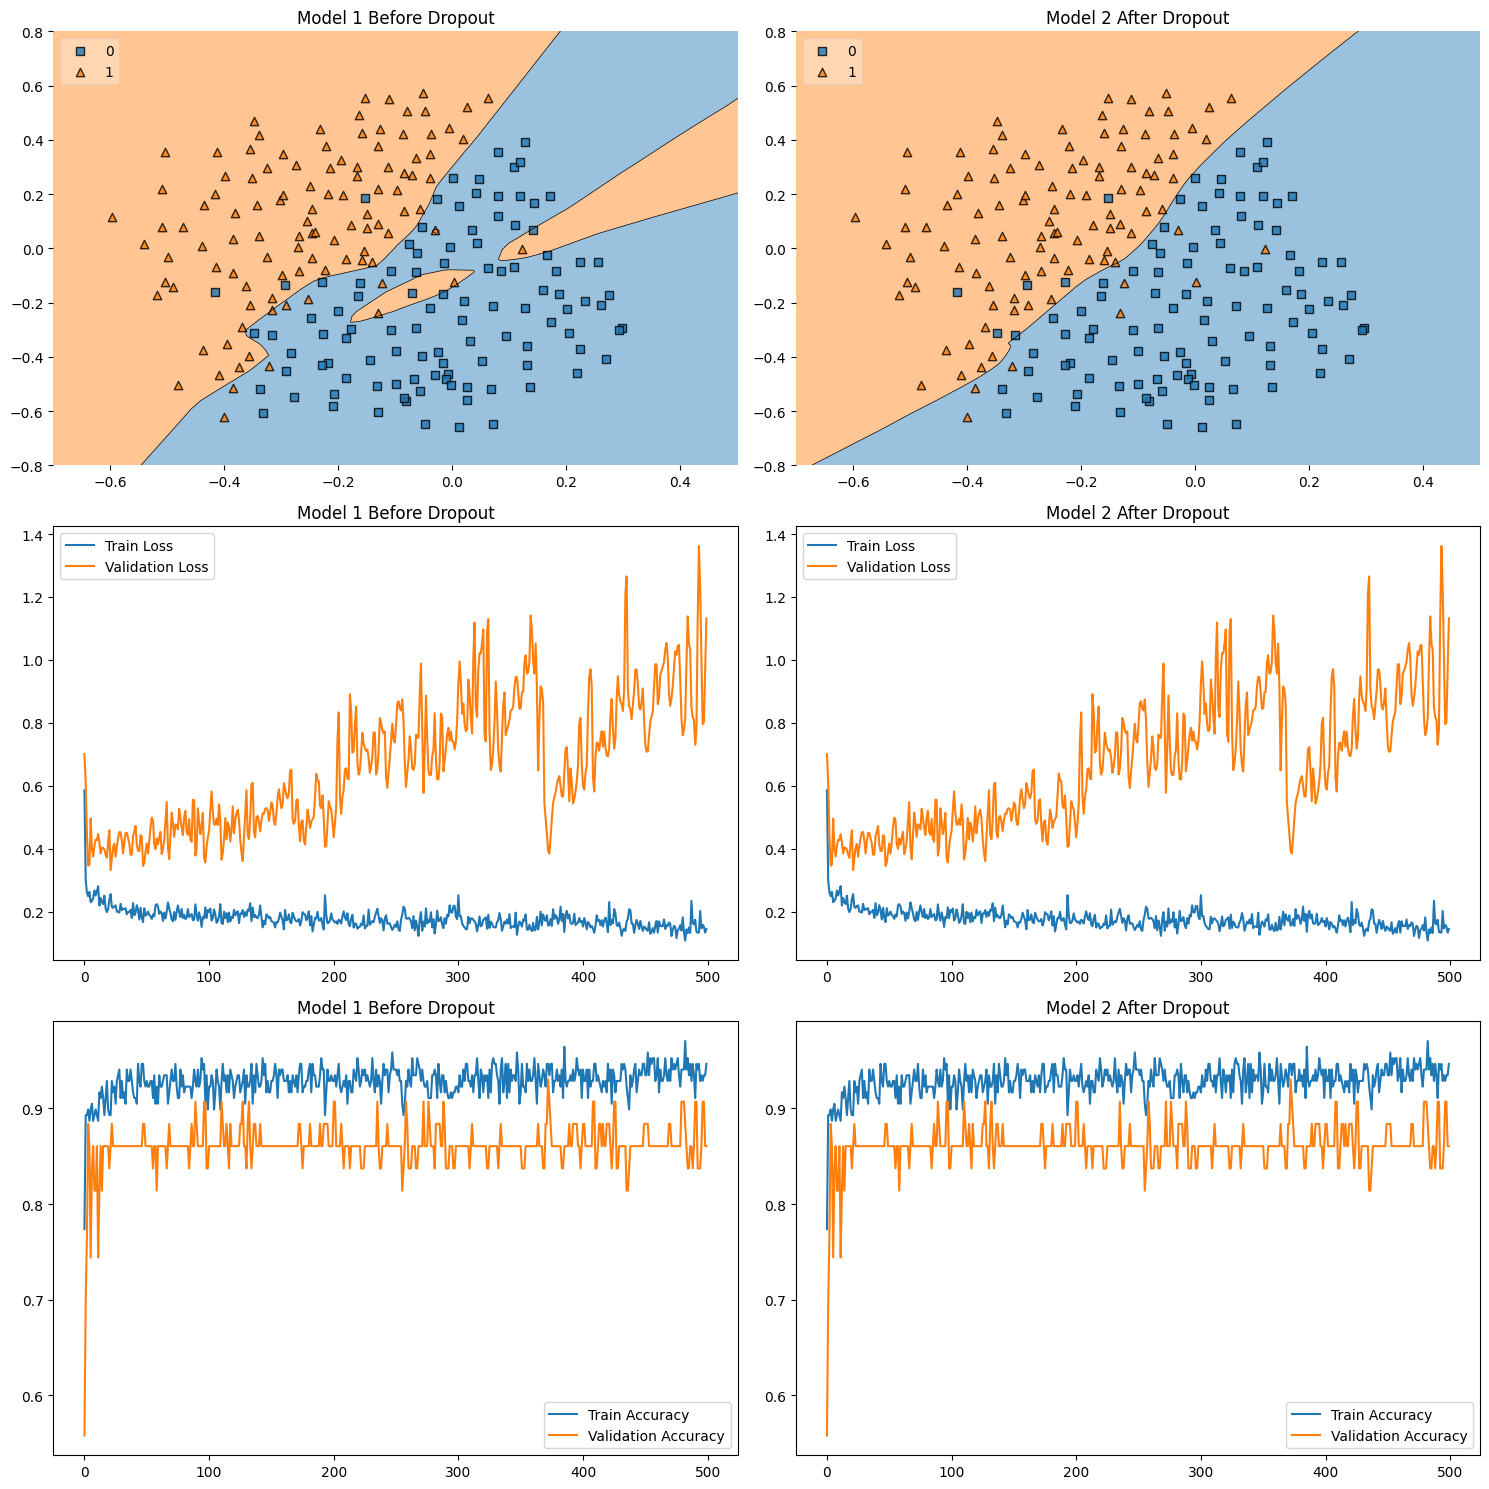

In [38]:
# Assuming you have model_1, model_2, and history for both models

plt.figure(figsize=(15, 15))

# Decision regions for model 1
plt.subplot(3, 2, 1)
plot_decision_regions(X, y.astype('int'), clf=model_1, legend=2)
plt.xlim(-0.7, 0.5)
plt.ylim(-0.8, 0.8)
plt.title('Model 1 Before Dropout')

# Loss curve for model 1
plt.subplot(3, 2, 3)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Model 1 Before Dropout')

# Accuracy curve for model 1
plt.subplot(3, 2, 5)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Model 1 Before Dropout')

# Decision regions for model 2
plt.subplot(3, 2, 2)
plot_decision_regions(X, y.astype('int'), clf=model_2, legend=2)
plt.xlim(-0.7, 0.5)
plt.ylim(-0.8, 0.8)
plt.title('Model 2 After Dropout')

# Loss curve for model 2
plt.subplot(3, 2, 4)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Model 2 After Dropout')

# Accuracy curve for model 2
plt.subplot(3, 2, 6)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Model 2 After Dropout')

plt.tight_layout()
plt.show()